In [1]:
# hiyeraşik bölütleme
# iki başlık altında ele alırız
# agglomerative
# divisive

[[ 58643.47826087   5844.92753623]
 [104386.95652174   7289.13043478]
 [ 22069.41176471   5320.88235294]]


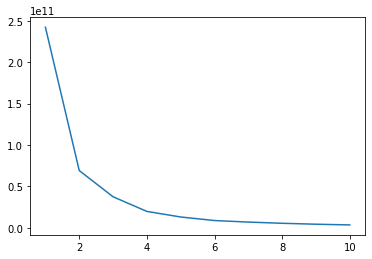

[2 2 2 1 1 1 1 2 1 3 3 2 3 1 2 0 2 1 2 2 1 1 2 3 0 3 1 2 1 3 1 3 3 2 3 3 3
 1 3 0 0 1 2 1 1 3 3 3 3 0 1 2 0 0 2 2 1 2 3 2 0 2 3 1 3 1 3 2 3 1 2 2 2 2
 1 1 0 2 3 1 1 1 3 3 0 2 2 3 1 1 2 1 0 3 1 3 1 2 1 1 3 0 2 1 1 2 2 3 3 0 0
 2 2 2 2 3 1 2 3 3 1 3 2 2 2 3 1 1 0 1 1 3 3 3 3 1 3 3 2 3 2 1 3 3 2 3 3 3
 3 1 3 3 2 1 3 0 1 3 0 1 3 3 3 3 1 3 3 2 1 1 2 1 1 3 2 1 1 3 0 3 3 2 3 0 2
 0 1 1 3 1 3 1 3 2 1 2 2 3 3 3]


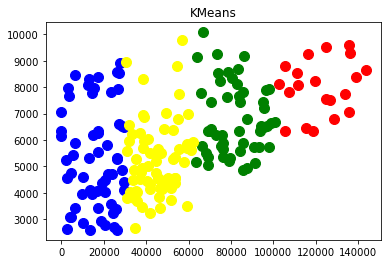

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

veriler = pd.read_csv('musteriler.csv')

X = veriler.iloc[:,3:].values

#kmeans

from sklearn.cluster import KMeans

kmeans = KMeans ( n_clusters = 3, init = 'k-means++')
kmeans.fit(X)

print(kmeans.cluster_centers_)
sonuclar = []
for i in range(1,11):
    kmeans = KMeans (n_clusters = i, init='k-means++', random_state= 123)
    kmeans.fit(X)
    sonuclar.append(kmeans.inertia_)

plt.plot(range(1,11),sonuclar)
plt.show()

kmeans = KMeans (n_clusters = 4, init='k-means++', random_state= 123)
Y_tahmin= kmeans.fit_predict(X)
print(Y_tahmin)  
plt.scatter(X[Y_tahmin==0,0],X[Y_tahmin==0,1],s=100, c='red')
plt.scatter(X[Y_tahmin==1,0],X[Y_tahmin==1,1],s=100, c='blue')
plt.scatter(X[Y_tahmin==2,0],X[Y_tahmin==2,1],s=100, c='green')
plt.scatter(X[Y_tahmin==3,0],X[Y_tahmin==3,1],s=100, c='yellow')
plt.title('KMeans')
plt.show()


[0 0 0 2 2 2 2 0 2 1 1 0 1 2 0 3 0 2 0 0 2 2 0 1 3 1 2 0 2 1 2 1 1 0 1 1 1
 2 1 3 0 2 0 2 2 1 1 1 1 3 2 0 3 3 0 0 2 0 1 0 3 0 1 2 1 2 1 0 1 2 0 0 0 0
 2 2 3 0 1 2 2 2 1 1 3 0 0 1 2 2 0 2 3 1 2 1 2 0 2 2 1 3 0 2 2 0 0 1 1 3 3
 0 0 0 0 1 2 0 1 1 2 1 0 0 0 1 2 2 3 2 2 1 1 1 1 2 1 1 0 1 0 2 1 1 0 1 1 1
 1 2 1 1 0 2 1 3 2 1 3 2 1 1 2 1 2 1 1 0 2 2 0 2 2 1 1 2 2 1 3 1 1 0 1 3 0
 3 2 2 1 2 1 2 1 0 2 0 0 1 1 1]


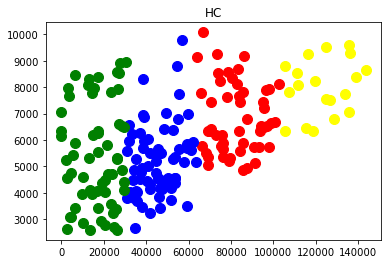

In [3]:
#HC
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
Y_tahmin = ac.fit_predict(X)
print(Y_tahmin)

plt.scatter(X[Y_tahmin==0,0],X[Y_tahmin==0,1],s=100, c='red')
plt.scatter(X[Y_tahmin==1,0],X[Y_tahmin==1,1],s=100, c='blue')
plt.scatter(X[Y_tahmin==2,0],X[Y_tahmin==2,1],s=100, c='green')
plt.scatter(X[Y_tahmin==3,0],X[Y_tahmin==3,1],s=100, c='yellow')
plt.title('HC')
plt.show()


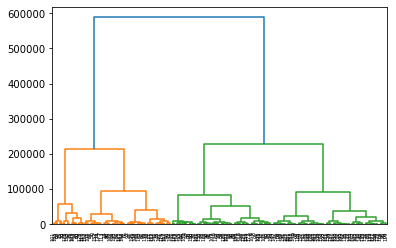

In [4]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()